In [1]:
import pandas as pd
%pylab inline
import seaborn as sb
import statsmodels.api as st

Populating the interactive namespace from numpy and matplotlib


In [3]:
raw_data = pd.read_csv('LabourTrainingEvaluationData.csv')
raw_data

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.6700,25243.5500,25564.6700
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.9710,5852.5650,13496.0800
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.0200,25130.7600,25564.6700
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.3700,25243.5500,25564.6700
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.2950,10727.6100,9860.8690
5,22,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16365.7600,18449.2700,25564.6700
6,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16804.6300,16354.6000,18059.3000
7,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,1144.2120,3620.0320,15739.2700
8,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.3200,25243.5500,25564.6700
9,45,HighSchool,NotBlack,NotHispanic,Married,0,25862.3200,0.0000,3924.8420


In [16]:
data = raw_data.drop('Earnings_1978',1)
data_1974 = data.drop('Earnings_1975',1)
data_1974['Year'] = 1974
data_1974 = data_1974.rename(columns={'Earnings_1974':'Earnings'})
data_1974

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings,Year
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.6700,1974
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.9710,1974
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.0200,1974
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.3700,1974
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.2950,1974
5,22,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16365.7600,1974
6,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16804.6300,1974
7,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,1144.2120,1974
8,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.3200,1974
9,45,HighSchool,NotBlack,NotHispanic,Married,0,25862.3200,1974


In [20]:
data_1975 = data.drop('Earnings_1974',1)
data_1975['Year'] = 1975
data_1975 = data_1975.rename(columns={'Earnings_1975':'Earnings'})
data_1975['Age'] = data_1975['Age']+1
data_1975

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings,Year
0,46,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25243.5500,1975
1,22,Intermediate,NotBlack,NotHispanic,NotMarried,0,5852.5650,1975
2,39,HighSchool,NotBlack,NotHispanic,Married,0,25130.7600,1975
3,49,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25243.5500,1975
4,19,LessThanHighSchool,NotBlack,NotHispanic,Married,1,10727.6100,1975
5,23,LessThanHighSchool,NotBlack,NotHispanic,Married,1,18449.2700,1975
6,49,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16354.6000,1975
7,19,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,3620.0320,1975
8,49,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25243.5500,1975
9,46,HighSchool,NotBlack,NotHispanic,Married,0,0.0000,1975


In [23]:
raw_tr = data_1974.append(data_1975)
raw_tr = raw_tr.rename(columns={'Eduacation':'Education'})
raw_tr

,Age,Education,Race,Hisp,MaritalStatus,Nodeg,Earnings,Year
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.6700,1974
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.9710,1974
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.0200,1974
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.3700,1974
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.2950,1974
5,22,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16365.7600,1974
6,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16804.6300,1974
7,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,1144.2120,1974
8,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.3200,1974
9,45,HighSchool,NotBlack,NotHispanic,Married,0,25862.3200,1974


In [28]:
raw_tr.describe()

,Age,Nodeg,Earnings,Year
count,31984.000000,31984.000000,31984.000000,31984.000000
mean,33.725238,0.295835,13833.801840,1974.500000
std,11.056355,0.456425,9422.918812,0.500008
min,16.000000,0.000000,0.000000,1974.000000
25%,25.000000,0.000000,4398.823000,1974.000000
50%,32.000000,0.000000,14820.870000,1974.500000
75%,43.000000,1.000000,23274.190000,1975.000000
max,56.000000,1.000000,25862.320000,1975.000000


In [27]:
raw_tr.groupby('Education')[['Age','Earnings']].mean()

,Age,Earnings
Education,,
HighSchool,33.849808,15004.358159
Intermediate,32.057238,13986.943924
LessThanHighSchool,34.617734,11363.547301
PostGraduate,34.653105,14810.631555
graduate,32.737015,16058.665339


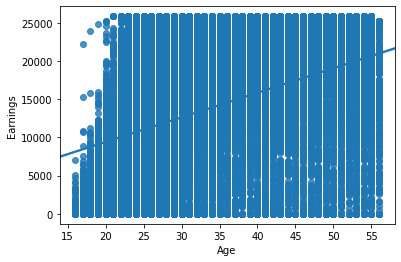

In [26]:
sb.regplot(raw_tr.Age, raw_tr.Earnings)

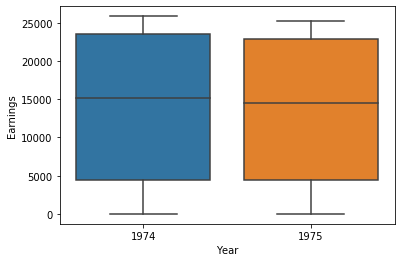

In [29]:
sb.boxplot(raw_tr.Year, raw_tr.Earnings)

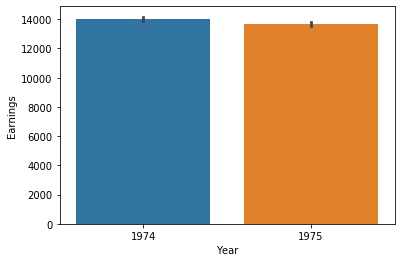

In [30]:
sb.barplot(raw_tr.Year, raw_tr.Earnings)

In [41]:
raw_tr1 = st.add_constant(raw_tr)
X = pd.get_dummies(raw_tr1.drop('Earnings',1), drop_first=True) 
y = raw_tr1.Earnings

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
X.shape, y.shape

((31984, 11), (31984,))

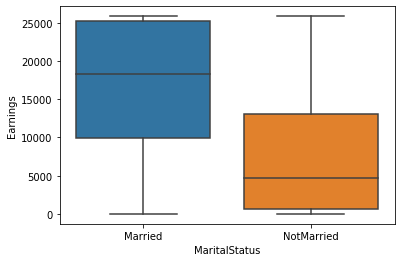

In [88]:
sb.boxplot(raw_tr.MaritalStatus, raw_tr.Earnings)

In [44]:
ln = st.OLS(y, X).fit()
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Earnings   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:11:09   Log-Likelihood:            -3.3352e+05
No. Observations:               31984   AIC:                         6.671e+05
Df Residuals:                   31974   BIC:                         6.671e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.177e+06   1.81e+05      6.515      0.000    8.23e+05    1.53e+06
Age                            225.7699      4.636     48.703      0.000     216.684     234.856
Nodeg                        -1587.4653     56.600    -28.047      0.000   -1698.403   -1476.528
Year                          -591.7668     91.538     -6.465      0.000    -771.185    -412.349
Education_Intermediate        -259.6990    133.253     -1.949      0.051    -520.879       1.481
Education_LessThanHighSchool -1587.4652     56.600    -28.047      0.000   -1698.403   -1476.528
Education_PostGraduate        -439.3308    202.979     -2.164      0.030    -837.177     -41.484
Education_graduate            1293.4951    172.773      7.487      0.000     954.853    1632.137
Race_black                   -1721.7119    176.921     -9.732      0.000   -2068.484   -1374.939
Hisp_hispanic                 -961.3738    179.615     -5.352      0.000   -1313.426    -609.321
MaritalStatus_NotMarried     -5780.2357    113.191    -51.066      0.000   -6002.094   -5558.377
==============================================================================
Omnibus:                     1462.330   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1455.221
Skew:                          -0.482   Prob(JB):                         0.00
Kurtosis:                       2.598   Cond. No.                     1.03e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
te_data = raw_data.drop(['Earnings_1978', 'Earnings_1975', 'Earnings_1974'],1)
te_data['Year'] = 1978
te_data['Age'] = te_data['Age']+4
te_data = te_data.rename(columns={'Eduacation':'Education'})
X_test = pd.get_dummies(te_data, drop_first=True)
X_test['const'] = 1
X_test = X_test[X.columns]
X_test

,const,Age,Nodeg,Year,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,Race_black,Hisp_hispanic,MaritalStatus_NotMarried
0,1,49,1,1978,0,1,0,0,0,0,0
1,1,25,0,1978,1,0,0,0,0,0,1
2,1,42,0,1978,0,0,0,0,0,0,0
3,1,52,1,1978,0,1,0,0,0,0,0
4,1,22,1,1978,0,1,0,0,0,0,0
5,1,26,1,1978,0,1,0,0,0,0,0
6,1,52,1,1978,0,1,0,0,0,0,0
7,1,22,1,1978,0,1,0,0,0,0,1
8,1,52,1,1978,0,1,0,0,0,0,0
9,1,49,0,1978,0,0,0,0,0,0,0


In [94]:
#Mean Absolute Error
np.mean((ln.predict(X_test)-raw_data.Earnings_1978).abs())

8407.848609879948

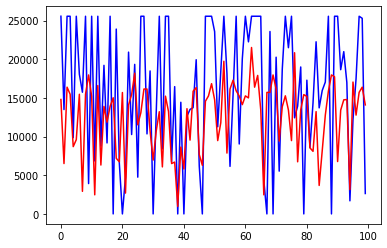

In [112]:
plt.plot(raw_data.Earnings_1978[:100],'b')
plt.plot(ln.predict(X_test)[:100],'r')

In [130]:
guess_number_game()

Welcome to the game!
Theif has entered a room number between 1 to 100. Find the theif.
Guess the Room Number: 16
Correct room number is bigger
Guess the Room Number: 75
Correct room number is lower
Guess the Room Number: 44
Correct room number is lower
Guess the Room Number: 33
Correct room number is bigger
Guess the Room Number: 40
Correct room number is lower
Guess the Room Number: 37
Correct room number is lower
Guess the Room Number: 35
Congrats!!! You won


In [125]:
def guess_number_game():
    print('Welcome to the game!')
    print('Theif has entered a room number between 1 to 100. Find the theif.')
    n = np.random.randint(1, 100)
    for i in range(10):
        guess = int(input("Guess the Room Number: "))
        if n>guess:
            print('Correct room number is bigger')
        elif n<guess:
            print('Correct room number is lower')
        elif n==guess:
            print('Congrats!!! You won')
            break